<a href="https://colab.research.google.com/github/melihilerialkan/BachelorFingerprintKlassifikation/blob/main/klassifikation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from tensorflow.keras import Sequential, models 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [ ]:
#Fuer welcher Finger an welcher Hand (10 Klasse)
def label_extrahieren(img_path):
    name, _ = os.path.splitext(os.path.basename(img_path))

    id, usw = name.split('__')

    Geschlecht, richtung, finger, _,_ = usw.split('_')

    if richtung == 'Left':

      if finger == 'thumb':
          finger = 0
      elif finger == 'index':
          finger = 1
      elif finger == 'middle':
          finger = 2
      elif finger == 'ring':
          finger = 3
      elif finger == 'little':
          finger = 4
    else:
      if finger == 'thumb':
          finger = 5
      elif finger == 'index':
          finger = 6
      elif finger == 'middle':
          finger = 7
      elif finger == 'ring':
          finger = 8
      elif finger == 'little':
          finger = 9


    return np.array([finger], dtype=np.uint16)

In [ ]:
#Fuer welcher Finger an welcher Hand (10 Klasse)
def test_label_extrahieren(img_path):
    name, _ = os.path.splitext(os.path.basename(img_path))

    id, usw = name.split('__')

    Geschlecht, richtung, finger, _ = usw.split('_')

    if richtung == 'Left':

      if finger == 'thumb':
          finger = 0
      elif finger == 'index':
          finger = 1
      elif finger == 'middle':
          finger = 2
      elif finger == 'ring':
          finger = 3
      elif finger == 'little':
          finger = 4
    else:
      if finger == 'thumb':
          finger = 5
      elif finger == 'index':
          finger = 6
      elif finger == 'middle':
          finger = 7
      elif finger == 'ring':
          finger = 8
      elif finger == 'little':
          finger = 9


    return np.array([finger], dtype=np.uint16)

In [ ]:
img_size = 96
#Function to iterate through all the images
def datenladen(path):
    data = []
    for img in os.listdir(path):
    
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resize = cv2.resize(img_array, (img_size, img_size))
        label = label_extrahieren(os.path.join(path, img))
        data.append([label[0], img_resize ])
       
    
    return data

In [ ]:
img_size = 96
#Function to iterate through all the images
def test_datenladen(path):
    data = []
    for img in os.listdir(path):
    
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resize = cv2.resize(img_array, (img_size, img_size))
        label = test_label_extrahieren(os.path.join(path, img))
        data.append([label[0], img_resize ])
       
    
    return data

In [ ]:
Real_path = "/content/drive/MyDrive/SOCOFing/Altered/Altered-Medium"
optimizer_path = "/content/drive/MyDrive/SOCOFing/Real"


In [ ]:
data = datenladen(Real_path)
random.shuffle(data)
X, y = [], []
for label, feature in data:
    y.append(label)
    X.append(feature)
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0
y = to_categorical(y, num_classes = 10)

In [ ]:
len(data)


17067

In [ ]:
optimizer = test_datenladen(optimizer_path)
X_optimizer, y_optimizer = [], []

for label, feature in test:
    X_optimizer.append(feature)
    y_optimizer.append(label)
X_optimizer = np.array(X_optimizer).reshape(-1, img_size, img_size, 1)
X_optimizer = X_optimizer / 255.0
y_optimizer = to_categorical(y_optimizer, num_classes = 10)

In [ ]:
test_path = "/content/drive/MyDrive/SOCOFing/Altered/Altered-Hard"
# Easy_path = "/test"
test = datenladen(test_path)
X_test, y_test = [], []

for label, feature in test:
    X_test.append(feature)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
X_test = X_test / 255.0
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 13)

In [ ]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([
                    Conv2D(32, 3, padding='same', activation='relu',kernel_initializer='he_uniform', input_shape = [96, 96, 1]),
                    MaxPooling2D(2),
                    Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(10, activation = 'softmax'),
                    ])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = optimizers.Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 50, 
          validation_data = (X_val,y_val), callbacks = [early_stopping_cb], verbose = 1)

Epoch 1/50
94/94 [==============================] - 128s 1s/step - loss: 2.3335 - accuracy: 0.2783 - val_loss: 1.5550 - val_accuracy: 0.4503
Epoch 2/50
94/94 [==============================] - 126s 1s/step - loss: 1.2886 - accuracy: 0.5403 - val_loss: 1.2088 - val_accuracy: 0.5704
Epoch 3/50
94/94 [==============================] - 126s 1s/step - loss: 1.0099 - accuracy: 0.6535 - val_loss: 1.0792 - val_accuracy: 0.6141
Epoch 4/50
94/94 [==============================] - 127s 1s/step - loss: 0.7930 - accuracy: 0.7361 - val_loss: 0.9841 - val_accuracy: 0.6643
Epoch 5/50
94/94 [==============================] - 128s 1s/step - loss: 0.5994 - accuracy: 0.8116 - val_loss: 0.9122 - val_accuracy: 0.6872
Epoch 6/50
94/94 [==============================] - 127s 1s/step - loss: 0.4361 - accuracy: 0.8688 - val_loss: 0.7882 - val_accuracy: 0.7385
Epoch 7/50
94/94 [==============================] - 127s 1s/step - loss: 0.2966 - accuracy: 0.9231 - val_loss: 0.6280 - val_accuracy: 0.7971
Epoch 8/50
94

(0.0, 1.0)

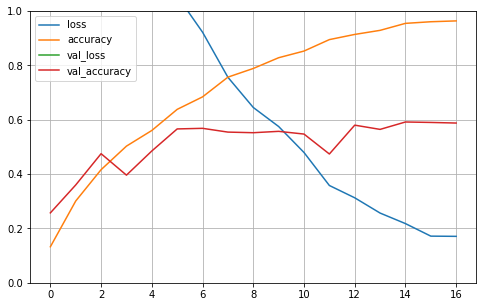

In [ ]:
#optimizers RMSProp
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

(0.0, 1.0)

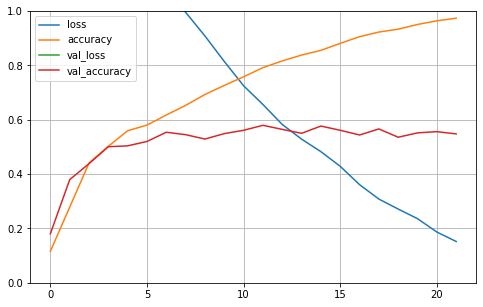

In [ ]:
#Optimizers Adam
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

(0.0, 1.0)

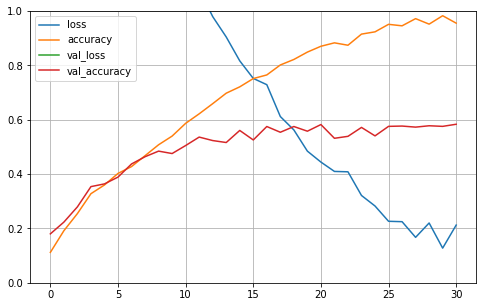

In [ ]:
#Optimizers Nadam
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

(0.0, 1.0)

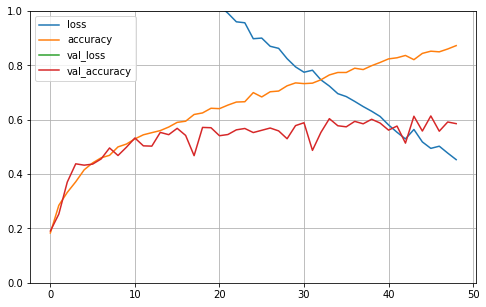

In [ ]:
#Optimizers Sgd
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

(0.0, 1.0)

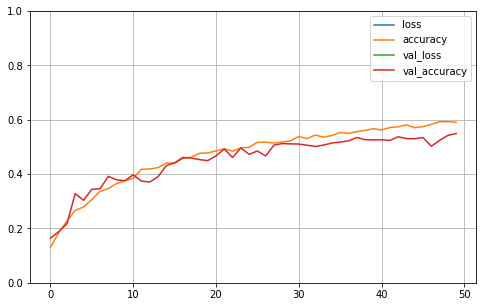

In [ ]:
#Optimizers Adagrad
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

(0.0, 1.0)

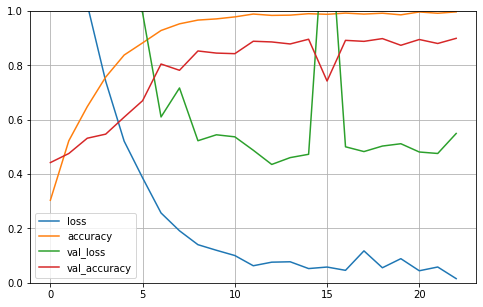

In [ ]:
#Optimizers Adagrad
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

(0.0, 1.0)

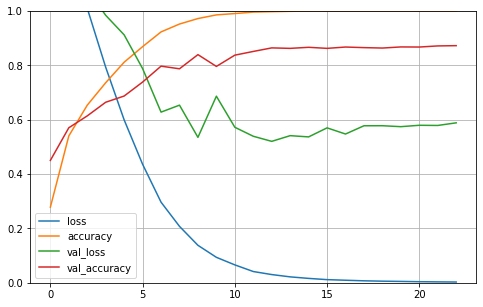

In [ ]:
#Optimizers Adagrad
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [ ]:
model.evaluate(X_test,y_test)

86/86 [==============================] - 7s 76ms/step - loss: 0.3245 - accuracy: 0.9145


[0.3245466351509094, 0.914463996887207]

In [ ]:
pred = model.predict_classes(X_test)

In [ ]:
pred = to_categorical(pred, num_classes = 10)

In [ ]:
pred[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)